# Solar Analysis

### Import, read, display:

In [57]:
# solar data
# fill in 0s for sq_ft, hrs_available, since impt to see if solar viable option
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [58]:
solar_data = pd.read_csv('solar_data.csv')
census_data = pd.read_csv('census_data.csv')
gas_data = pd.read_csv('gas_meter_data.csv')
total_gas_data = pd.read_csv('total_gas_data.csv')
total_meter_data = pd.read_csv('total_meter_data.csv')

In [59]:
print('HEAD', solar_data.head())
#other things

HEAD    house_id  device_id  gas_meter_id        lat       long  \
0  b1eb5eb2   83771758           NaN  42.191697 -72.613522   
1  b1eb5eb2   69525019           NaN  42.191697 -72.613522   
2  a90ea0b3    5827516    54363558.0  42.211167 -72.621543   
3  049bf03c   83770216    54459969.0  42.211157 -72.621317   
4  b2dc9fbe   56976532           NaN  42.210828 -72.621242   

   hours_of_sunlight_per_year  sq_ft_available_for_solar_panels  
0                        1404                              3207  
1                           0                                 0  
2                        1488                              1180  
3                        1504                              1163  
4                        1383                               846  


In [60]:
print('INFO', solar_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   house_id                          17052 non-null  object 
 1   device_id                         17052 non-null  int64  
 2   gas_meter_id                      10162 non-null  float64
 3   lat                               17052 non-null  float64
 4   long                              17052 non-null  float64
 5   hours_of_sunlight_per_year        17052 non-null  int64  
 6   sq_ft_available_for_solar_panels  17052 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 932.7+ KB
INFO None


In [61]:
print('DESC', solar_data.describe())

DESC           device_id  gas_meter_id           lat          long  \
count  1.705200e+04  1.016200e+04  17052.000000  17052.000000   
mean   4.486838e+07  5.648602e+07     42.202733    -72.623131   
std    4.449656e+07  1.977618e+07      0.069791      0.545868   
min    5.819832e+06  2.029568e+07     40.771841    -73.501843   
25%    2.039324e+07  4.626168e+07     42.194981    -72.635908   
50%    3.105131e+07  4.976170e+07     42.203596    -72.624741   
75%    5.676430e+07  5.635645e+07     42.210083    -72.615631   
max    3.383795e+08  1.007938e+08     50.929574     -1.391057   

       hours_of_sunlight_per_year  sq_ft_available_for_solar_panels  
count                17052.000000                      17052.000000  
mean                   730.968156                        885.132301  
std                    685.065756                       3563.142914  
min                      0.000000                          0.000000  
25%                      0.000000                          

#### 1. Data processing:

In [62]:
print(solar_data.isna().sum(), '\n')

house_id                               0
device_id                              0
gas_meter_id                        6890
lat                                    0
long                                   0
hours_of_sunlight_per_year             0
sq_ft_available_for_solar_panels       0
dtype: int64 



In [63]:
# find solar houses with all info
# remove independent variable columns
solar_filtered = solar_data.drop(['device_id', 'gas_meter_id'], axis=1)

# detect missing values, want to fill these
print('missing:') 
print(solar_filtered.eq(0).sum(), '\n')

#how many not missing
print('not missing:') 
print(solar_filtered.ne(0).sum())

missing:
house_id                               0
lat                                    0
long                                   0
hours_of_sunlight_per_year          7910
sq_ft_available_for_solar_panels    9124
dtype: int64 

not missing:
house_id                            17052
lat                                 17052
long                                17052
hours_of_sunlight_per_year           9142
sq_ft_available_for_solar_panels     7928
dtype: int64


In [64]:
gas_house_ids = set(gas_data['house_id'])
solar_house_ids = set(solar_data['house_id'])

common_house_ids = gas_house_ids.intersection(solar_house_ids)

print(f"Solar houses: {len(solar_house_ids)}")
print(f"Gas houses: {len(gas_house_ids)}")
print(f"Number of common house_ids in solar_data and gas_data: {len(common_house_ids)}")


Solar houses: 16754
Gas houses: 5747
Number of common house_ids in solar_data and gas_data: 5747


In [10]:
meter_house_ids = set(total_meter_data['house_id'])

common_house_ids2 = meter_house_ids.intersection(solar_house_ids)
common_house_ids3 = meter_house_ids.intersection(solar_house_ids)

print(f"common house_ids meter+solar: {len(common_house_ids2)}")

print(f"common house_ids meter+gas: {len(common_house_ids3)}")

Number of common house_ids meter+solar: 5748
Number of common house_ids meter+gas: 5748


In [11]:
total_gas_house_ids = set(total_gas_data['house_id'])
inter1 = gas_house_ids.intersection(total_gas_house_ids)
#around 1000 houses w gas house ids dont have total gas readings
print(f"Intersection bw gas house IDs and total gas houses: {len(inter1)}")

inter2 = solar_house_ids.intersection(total_gas_house_ids)
print(f"Intersection bw solar house IDs and total gas houses: {len(inter2)}")
print(inter1 == inter2)

Intersection bw gas house IDs and total gas houses: 4352
Intersection bw solar house IDs and total gas houses: 4352
True


In [13]:
solar_filtered = solar_data[solar_data['house_id'].isin(inter1)]

In [14]:
print(len(solar_filtered))

4389


In [27]:
print(solar_filtered['house_id'].nunique())
# remove duplicates
solar_filtered = solar_filtered.drop_duplicates(subset=["house_id"])
print(len(solar_filtered))

4352
4352


In [65]:
blocks_and_house_ids = census_data[['Block','house_ids']]
solar_house_ids = solar_data['house_id']
house_id_to_block = {}

for solar_row in range(len (solar_data. index)) :
    for census_row in range (len (census_data.index)) :
        house_ids_as_list = blocks_and_house_ids ['house_ids']. loc[census_row]
        solar_house_id = solar_house_ids.loc [solar_row]
        if solar_house_id in house_ids_as_list:
            house_id_to_block.update({solar_house_id:blocks_and_house_ids ['Block'].loc[census_row]})

solar_data['Block'] = solar_data['house_id'].map(house_id_to_block)


In [66]:
print(solar_data.head())

   house_id  device_id  gas_meter_id        lat       long  \
0  b1eb5eb2   83771758           NaN  42.191697 -72.613522   
1  b1eb5eb2   69525019           NaN  42.191697 -72.613522   
2  a90ea0b3    5827516    54363558.0  42.211167 -72.621543   
3  049bf03c   83770216    54459969.0  42.211157 -72.621317   
4  b2dc9fbe   56976532           NaN  42.210828 -72.621242   

   hours_of_sunlight_per_year  sq_ft_available_for_solar_panels     Block  
0                        1404                              3207  812103-1  
1                           0                                 0  812103-1  
2                        1488                              1180  811800-3  
3                        1504                              1163  811800-3  
4                        1383                               846  812001-3  


In [17]:
print('missing:') 
print(solar_filtered.eq(0).sum(), '\n')
print(solar_filtered.isna().sum(), '\n')

#none of the houses with total gas readings are missing values lol

missing:
house_id                            0
device_id                           0
gas_meter_id                        0
lat                                 0
long                                0
hours_of_sunlight_per_year          0
sq_ft_available_for_solar_panels    0
Block                               0
dtype: int64 

house_id                            0
device_id                           0
gas_meter_id                        0
lat                                 0
long                                0
hours_of_sunlight_per_year          0
sq_ft_available_for_solar_panels    0
Block                               0
dtype: int64 



In [15]:
solar_filtered.to_csv('solar_filtered.csv', index=False)

In [69]:
solar_copy = solar_data.copy().drop(['device_id', 'gas_meter_id'], axis=1)
print(solar_copy.head())

   house_id        lat       long  hours_of_sunlight_per_year  \
0  b1eb5eb2  42.191697 -72.613522                        1404   
1  b1eb5eb2  42.191697 -72.613522                           0   
2  a90ea0b3  42.211167 -72.621543                        1488   
3  049bf03c  42.211157 -72.621317                        1504   
4  b2dc9fbe  42.210828 -72.621242                        1383   

   sq_ft_available_for_solar_panels     Block  
0                              3207  812103-1  
1                                 0  812103-1  
2                              1180  811800-3  
3                              1163  811800-3  
4                               846  812001-3  


In [70]:
# format house_id the same
dfs = [solar_copy, total_gas_data, total_meter_data]

# Standardizing 'house_id'
for df in dfs:
    df['house_id'] = df['house_id'].astype(str).str.strip().str.lower()

solar_copy = solar_copy.drop_duplicates(subset='house_id')
total_gas_data = total_gas_data.drop_duplicates(subset='house_id')
total_meter_data = total_meter_data.drop_duplicates(subset='house_id')
print(f"gas: {len(total_gas_data)}")
print(f"meter: {len(total_meter_data)}")

gas: 4352
meter: 5748


In [72]:
solar_copy = solar_copy.copy()
#categorize energy data availability
solar_copy['energy_type'] = 'None'

solar_copy.loc[solar_copy['house_id'].isin(total_gas_data['house_id']), 'energy_type'] = 'Gas'

solar_copy.loc[solar_copy['house_id'].isin(total_meter_data['house_id']), 'energy_type'] = 'Meter'

solar_copy.loc[solar_copy['house_id'].isin(total_gas_data['house_id']) & solar_copy['house_id'].isin(total_meter_data['house_id']), 'energy_type'] = 'Both'

print(solar_copy.head())

   house_id        lat       long  hours_of_sunlight_per_year  \
0  b1eb5eb2  42.191697 -72.613522                        1404   
2  a90ea0b3  42.211167 -72.621543                        1488   
3  049bf03c  42.211157 -72.621317                        1504   
4  b2dc9fbe  42.210828 -72.621242                        1383   
5  569aaf4b  42.210727 -72.621080                        1337   

   sq_ft_available_for_solar_panels     Block energy_type  
0                              3207  812103-1        None  
2                              1180  811800-3       Meter  
3                              1163  811800-3       Meter  
4                               846  812001-3        None  
5                               440  812001-3        Both  


In [97]:
# change 0s to NaNs for knn imputation
solar_copy['sq_ft_available_for_solar_panels'].replace(0, np.nan, inplace=True)
solar_copy['hours_of_sunlight_per_year'].replace(0, np.nan, inplace=True)

print(solar_copy.isna().sum(), '\n')

# # Calculate total energy where both readings are available
# solar_data['total_energy_usage'] = solar_data['total_gas_usage'].fillna(0) + solar_data['total_meter_usage'].fillna(0)
# solar_data['total_energy_usage'].replace(0, np.nan, inplace=True)

# # Check the data
# print(solar_data.head())

house_id                                          0
lat                                               0
long                                              0
hours_of_sunlight_per_year                        0
sq_ft_available_for_solar_panels                  0
Block                                             0
energy_type                                       0
total_gas_usage                               12396
total_usage                                   11748
sq_ft_available_for_solar_panels_block_avg        0
hours_of_sunlight_per_year_block_avg              0
total_energy_usage                            11748
geo_cluster                                       0
dtype: int64 



/var/folders/y9/nl6wrx1x5wz2_yp2gftwcpmr0000gn/T/ipykernel_29822/3665488565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solar_copy['sq_ft_available_for_solar_panels'].replace(0, np.nan, inplace=True)
/var/folders/y9/nl6wrx1x5wz2_yp2gftwcpmr0000gn/T/ipykernel_29822/3665488565.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [74]:
solar_copy.dropna(subset=['Block'], inplace=True)

print(solar_copy.isna().sum())

house_id                               0
lat                                    0
long                                   0
hours_of_sunlight_per_year          7611
sq_ft_available_for_solar_panels    8825
Block                                  0
energy_type                            0
dtype: int64


In [75]:
solar_copy = solar_copy.merge(total_gas_data, on='house_id', how='left')

solar_copy = solar_copy.merge(total_meter_data, on='house_id', how='left', suffixes=('_gas', '_meter'))

print(solar_copy.head())

   house_id        lat       long  hours_of_sunlight_per_year  \
0  b1eb5eb2  42.191697 -72.613522                      1404.0   
1  a90ea0b3  42.211167 -72.621543                      1488.0   
2  049bf03c  42.211157 -72.621317                      1504.0   
3  b2dc9fbe  42.210828 -72.621242                      1383.0   
4  569aaf4b  42.210727 -72.621080                      1337.0   

   sq_ft_available_for_solar_panels     Block energy_type  total_gas_usage  \
0                            3207.0  812103-1        None              NaN   
1                            1180.0  811800-3       Meter              NaN   
2                            1163.0  811800-3       Meter              NaN   
3                             846.0  812001-3        None              NaN   
4                             440.0  812001-3        Both         21377.52   

   total_usage  
0          NaN  
1       159.84  
2         0.00  
3          NaN  
4       445.56  


In [76]:
# calculate block avgs for sq footage and sunlight hours
block_averages = solar_copy.groupby('Block').agg({
    'sq_ft_available_for_solar_panels': 'mean',
    'hours_of_sunlight_per_year': 'mean'
}).reset_index()

solar_copy = solar_copy.merge(block_averages, on='Block', suffixes=('', '_block_avg'))

print(solar_copy.head())

   house_id        lat       long  hours_of_sunlight_per_year  \
0  b1eb5eb2  42.191697 -72.613522                      1404.0   
1  a90ea0b3  42.211167 -72.621543                      1488.0   
2  049bf03c  42.211157 -72.621317                      1504.0   
3  b2dc9fbe  42.210828 -72.621242                      1383.0   
4  569aaf4b  42.210727 -72.621080                      1337.0   

   sq_ft_available_for_solar_panels     Block energy_type  total_gas_usage  \
0                            3207.0  812103-1        None              NaN   
1                            1180.0  811800-3       Meter              NaN   
2                            1163.0  811800-3       Meter              NaN   
3                             846.0  812001-3        None              NaN   
4                             440.0  812001-3        Both         21377.52   

   total_usage  sq_ft_available_for_solar_panels_block_avg  \
0          NaN                                 3863.350649   
1       159.84  

In [98]:
#treat 0 energy readings as NaN 
solar_copy['total_gas_usage'].replace(0, np.nan, inplace=True)
solar_copy['total_usage'].replace(0, np.nan, inplace=True)

print(solar_copy.head())

   house_id       lat      long  hours_of_sunlight_per_year  \
0  b1eb5eb2  0.940719  0.801404                      1404.0   
1  a90ea0b3  0.953618  0.794167                      1488.0   
2  049bf03c  0.953612  0.794371                      1504.0   
3  b2dc9fbe  0.953394  0.794439                      1383.0   
4  569aaf4b  0.953327  0.794585                      1337.0   

   sq_ft_available_for_solar_panels     Block energy_type  total_gas_usage  \
0                            3207.0  812103-1        None              NaN   
1                            1180.0  811800-3       Meter              NaN   
2                            1163.0  811800-3       Meter              NaN   
3                             846.0  812001-3        None              NaN   
4                             440.0  812001-3        Both         21377.52   

   total_usage  sq_ft_available_for_solar_panels_block_avg  \
0          NaN                                 3863.350649   
1       159.84              

/var/folders/y9/nl6wrx1x5wz2_yp2gftwcpmr0000gn/T/ipykernel_29822/3574677285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solar_copy['total_gas_usage'].replace(0, np.nan, inplace=True)
/var/folders/y9/nl6wrx1x5wz2_yp2gftwcpmr0000gn/T/ipykernel_29822/3574677285.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [80]:
#impute hours_of_sunlight using lat and long

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
solar_copy[['lat', 'long']] = scaler.fit_transform(solar_copy[['lat', 'long']])

imputer = KNNImputer(n_neighbors=5)

cols_for_knn = ['lat', 'long', 'hours_of_sunlight_per_year']
solar_copy[cols_for_knn] = imputer.fit_transform(solar_copy[cols_for_knn])

print(solar_copy[['lat', 'long', 'hours_of_sunlight_per_year']].head())
print(solar_copy.isna().sum())


        lat      long  hours_of_sunlight_per_year
0  0.940719  0.801404                      1404.0
1  0.953618  0.794167                      1488.0
2  0.953612  0.794371                      1504.0
3  0.953394  0.794439                      1383.0
4  0.953327  0.794585                      1337.0
house_id                                          0
lat                                               0
long                                              0
hours_of_sunlight_per_year                        0
sq_ft_available_for_solar_panels               8825
Block                                             0
energy_type                                       0
total_gas_usage                               12401
total_usage                                   11753
sq_ft_available_for_solar_panels_block_avg        5
hours_of_sunlight_per_year_block_avg              5
dtype: int64
house_id                                         -1
lat                                              -1
long       

In [82]:
missing_block_avg_hrs = solar_copy[solar_copy['hours_of_sunlight_per_year_block_avg'].isna()]

print("Rows with missing block averages for hours of sunlight per year:")
print(missing_block_avg_hrs[['Block', 'hours_of_sunlight_per_year_block_avg']])

missing_block_avg_ft = solar_copy[solar_copy['sq_ft_available_for_solar_panels_block_avg'].isna()]

print("Rows with missing block averages for roof space:")
print(missing_block_avg_ft[['Block', 'sq_ft_available_for_solar_panels_block_avg']])

#can maybe handle this if i have time, but dropping for now
solar_copy = solar_copy.dropna(subset=['hours_of_sunlight_per_year_block_avg', 'sq_ft_available_for_solar_panels_block_avg'])



Rows with missing block averages for hours of sunlight per year:
          Block  hours_of_sunlight_per_year_block_avg
11989  812202-1                                   NaN
11990  812202-1                                   NaN
11993  812202-1                                   NaN
11994  812202-1                                   NaN
11995  812202-1                                   NaN
Rows with missing block averages for roof space:
          Block  sq_ft_available_for_solar_panels_block_avg
11989  812202-1                                         NaN
11990  812202-1                                         NaN
11993  812202-1                                         NaN
11994  812202-1                                         NaN
11995  812202-1                                         NaN


In [85]:
# regression when total energy usage is available
# otherwise, use block averages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


solar_copy['total_energy_usage'] = solar_copy.apply(
    lambda row: (row['total_gas_usage'] + row['total_usage']) / 2 if row['energy_type'] == 'Both' 
    else row['total_gas_usage'] if row['energy_type'] == 'Gas' 
    else row['total_usage'] if row['energy_type'] == 'Meter' 
    else np.nan, 
    axis = 1
)

print(solar_copy.isna().sum())
print(solar_copy.head())


house_id                                          0
lat                                               0
long                                              0
hours_of_sunlight_per_year                        0
sq_ft_available_for_solar_panels               8820
Block                                             0
energy_type                                       0
total_gas_usage                               12396
total_usage                                   11748
sq_ft_available_for_solar_panels_block_avg        0
hours_of_sunlight_per_year_block_avg              0
total_energy_usage                            11748
dtype: int64
   house_id       lat      long  hours_of_sunlight_per_year  \
0  b1eb5eb2  0.940719  0.801404                      1404.0   
1  a90ea0b3  0.953618  0.794167                      1488.0   
2  049bf03c  0.953612  0.794371                      1504.0   
3  b2dc9fbe  0.953394  0.794439                      1383.0   
4  569aaf4b  0.953327  0.794585                 

In [88]:
print(len(solar_copy))
#5k w total usage data

16748


In [89]:
# how many of these houses have null sq footage
houses_energy_null_sqft = solar_copy[
    solar_copy['total_usage'].notna() & 
    solar_copy['sq_ft_available_for_solar_panels'].isna()
]

print(len(houses_energy_null_sqft))

0


In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

geo_data = solar_copy[['lat', 'long']]
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_data) 

kmeans = KMeans(n_clusters=10, random_state=42) 
clusters = kmeans.fit_predict(geo_scaled)
solar_copy['geo_cluster'] = np.nan 
solar_copy.loc[geo_data.index, 'geo_cluster'] = clusters 

cluster_avg = solar_copy.groupby('geo_cluster')['sq_ft_available_for_solar_panels'].mean().to_dict()

missing_sq_ft = solar_copy['sq_ft_available_for_solar_panels'].isna()
solar_copy.loc[missing_sq_ft, 'sq_ft_available_for_solar_panels'] = solar_copy.loc[missing_sq_ft, 'geo_cluster'].map(cluster_avg)

print(solar_copy[['house_id', 'geo_cluster', 'sq_ft_available_for_solar_panels']].head())
print(solar_copy.isna().sum())

   house_id  geo_cluster  sq_ft_available_for_solar_panels
0  b1eb5eb2          2.0                            3207.0
1  a90ea0b3          9.0                            1180.0
2  049bf03c          9.0                            1163.0
3  b2dc9fbe          9.0                             846.0
4  569aaf4b          9.0                             440.0
house_id                                          0
lat                                               0
long                                              0
hours_of_sunlight_per_year                        0
sq_ft_available_for_solar_panels                  0
Block                                             0
energy_type                                       0
total_gas_usage                               12396
total_usage                                   11748
sq_ft_available_for_solar_panels_block_avg        0
hours_of_sunlight_per_year_block_avg              0
total_energy_usage                            11748
geo_cluster           

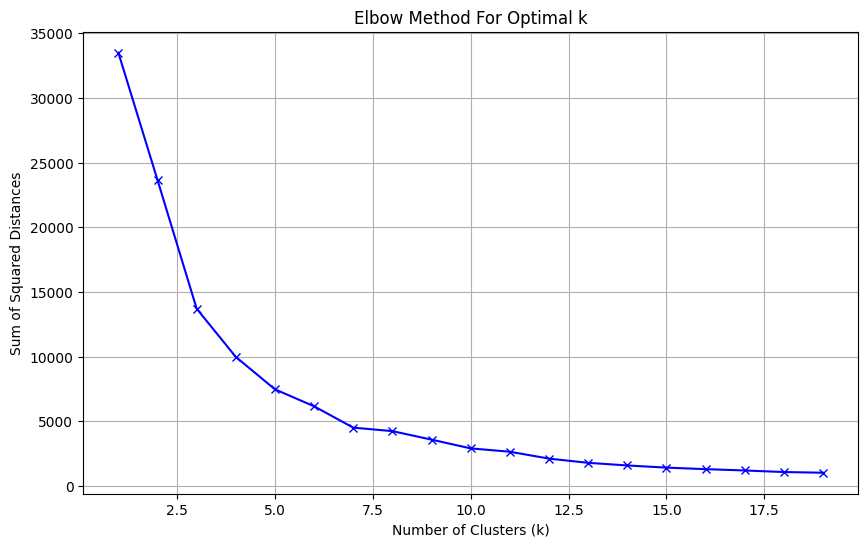

In [94]:
# elbow method
# sum of squared distances for a range of k values
sum_of_squared_distances = []
K = range(1, 20) 
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(geo_scaled)
    sum_of_squared_distances.append(km.inertia_)

# find elbow
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# k = 4 is optimal

In [99]:
geo_data = solar_copy[['lat', 'long']]
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_data) 

kmeans = KMeans(n_clusters=4, random_state=42) 
clusters = kmeans.fit_predict(geo_scaled)

solar_copy['geo_cluster'] = clusters 

cluster_avg = solar_copy.groupby('geo_cluster')['sq_ft_available_for_solar_panels'].mean().to_dict()

missing_sq_ft = solar_copy['sq_ft_available_for_solar_panels'].isna()
solar_copy.loc[missing_sq_ft, 'sq_ft_available_for_solar_panels'] = solar_copy.loc[missing_sq_ft, 'geo_cluster'].map(cluster_avg)

print(solar_copy[['house_id', 'geo_cluster', 'sq_ft_available_for_solar_panels']].head())
print(solar_copy.isna().sum())

   house_id  geo_cluster  sq_ft_available_for_solar_panels
0  b1eb5eb2            3                            3207.0
1  a90ea0b3            3                            1180.0
2  049bf03c            3                            1163.0
3  b2dc9fbe            3                             846.0
4  569aaf4b            3                             440.0
house_id                                          0
lat                                               0
long                                              0
hours_of_sunlight_per_year                        0
sq_ft_available_for_solar_panels                  0
Block                                             0
energy_type                                       0
total_gas_usage                               12396
total_usage                                   11748
sq_ft_available_for_solar_panels_block_avg        0
hours_of_sunlight_per_year_block_avg              0
total_energy_usage                            11748
geo_cluster           

In [100]:
solar_copy.to_csv('solar_imputed.csv', index=False)

In [101]:
# compare block averages to imputed values
solar_copy['diff_sq_ft'] = solar_copy['sq_ft_available_for_solar_panels'] - solar_copy['sq_ft_available_for_solar_panels_block_avg']

solar_copy['diff_sunlight_hrs'] = solar_copy['hours_of_sunlight_per_year'] - solar_copy['hours_of_sunlight_per_year_block_avg']

print(solar_copy[['diff_sq_ft', 'diff_sunlight_hrs']].describe())



          diff_sq_ft  diff_sunlight_hrs
count   16748.000000       16748.000000
mean     -157.205498           4.772271
std      3464.669334          86.796673
min     -4302.478261        -593.048077
25%      -779.347368         -27.400683
50%      -259.769231          13.735874
75%       123.883401          55.691071
max    175984.649351         250.325758


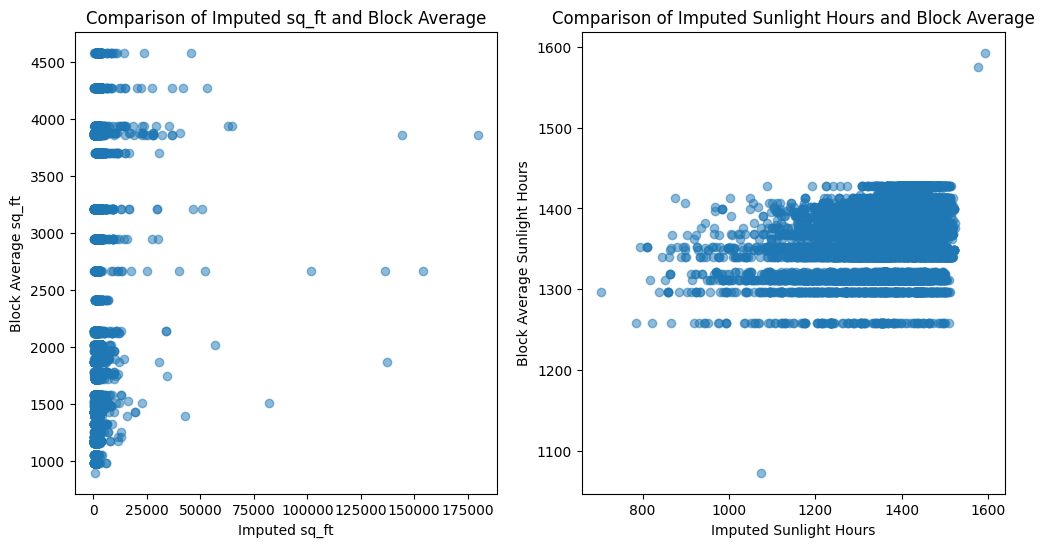

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(solar_copy['sq_ft_available_for_solar_panels'], solar_copy['sq_ft_available_for_solar_panels_block_avg'], alpha=0.5)
plt.title('Comparison of Imputed sq_ft and Block Average')
plt.xlabel('Imputed sq_ft')
plt.ylabel('Block Average sq_ft')

plt.subplot(1, 2, 2)
plt.scatter(solar_copy['hours_of_sunlight_per_year'], solar_copy['hours_of_sunlight_per_year_block_avg'], alpha=0.5)
plt.title('Comparison of Imputed Sunlight Hours and Block Average')
plt.xlabel('Imputed Sunlight Hours')
plt.ylabel('Block Average Sunlight Hours')

plt.show()